In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_colwidth', None)
import re
import csv
from sklearn.preprocessing import LabelEncoder


In [ ]:
data = pd.read_csv('laptop_details.csv')
data.head()


,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN | 82H802...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 10/4 GB Graphics/NVIDIA GeForce ...,4.4,"₹49,990","AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite Warranty"
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 inch) Display1 Year Onsite Warranty


In [ ]:
df = data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [ ]:
df.isna().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

## Feature Engineering
Since, this is mainly a text data, we will use the regex function to clean the data.
We will create new features such as Ram size, Ram type, Processor, Storage type, os from the poducts and feature table

In [ ]:
def features_extraction(row):
    product = row['Product']
    feature = row['Feature']
    
    ram_size = re.findall(r'(\d+) ?(?:GB|TB)', feature)
    ram_size = ram_size[0] + ' GB' if ram_size else None
    
    ram_type = re.findall(r'(?:LP)?DDR\d\S*|Unified\sMemory', feature)
    ram_type = ram_type[0] if ram_type else None
    
    processor = re.findall(r'(?:AMD|Intel|M1|Qualcomm|Apple)[\s\w]+Processor', feature)
    processor = processor[0] if processor else None

    storage = re.findall(r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD|EMMC)', product)
    storage = storage[0] if storage else None
    
    os = re.findall(r'(Windows (?:10|11)|Mac OS|Linux|DOS|Chrome)[\s\w]*Operating System', feature)
    os = os[0] if os else None

    display = re.findall(r'\d+(?:\.\d+)?\s*(?:cm|inch)\s*(?:\(|:)?\s*\d+(?:\.\d+)?\s*(?:cm|inch)?', feature)
    display = display[0] if display else None
    
    brand = re.findall(r'^\w+', product)
    brand = brand[0] if brand else None
    
    return pd.Series([ram_size, ram_type, processor, storage, os, display, brand], 
                     index=['Ram Size', 'Ram Type', 'Processor', 'Storage', 'OS', 'Display', 'Brand'])

df[['Ram Size', 'Ram Type', 'Processor', 'Storage', 'OS', 'Display', 'Brand']] = df.apply(features_extraction, axis=1)

In [ ]:
## Data Cleaning
df.MRP = df.MRP.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(float)

In [ ]:

df2 = df.copy()

In [ ]:
df2.drop(df2.columns[[0, 1, 3]], axis=1, inplace=True)
df2.isna().sum()

MRP          0
Ram Size     0
Ram Type     0
Processor    0
Storage      0
OS           0
Display      0
Brand        0
dtype: int64

In [ ]:
df2['Ram Type'] = df2['Ram Type'].str.replace('DDR4,','DDR4')

In [ ]:
df2['StorageType'] = df2.Storage.apply(lambda x: x.split()[-1])
df2['Storage'] = df2.Storage.apply(lambda x: " ".join(x.split()[:2]))

NameError: ignored

In [ ]:
dataviz = df2.copy()

### Visualization

In [ ]:
import seaborn as sns

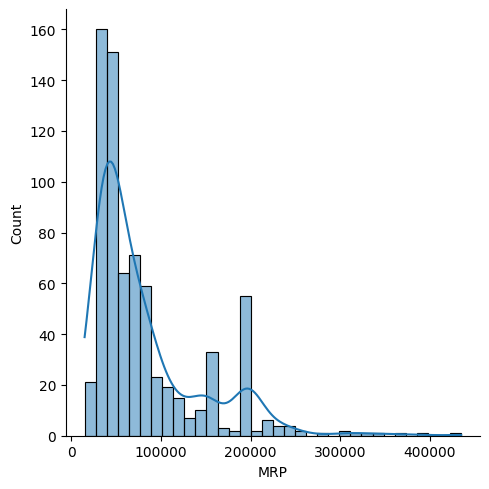

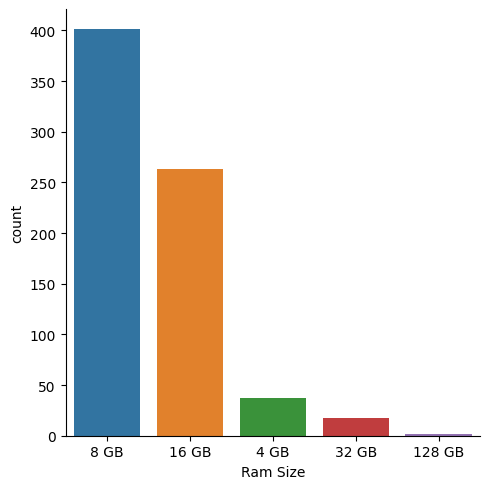

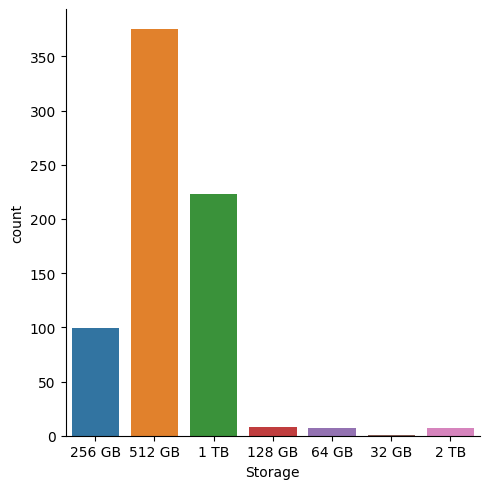

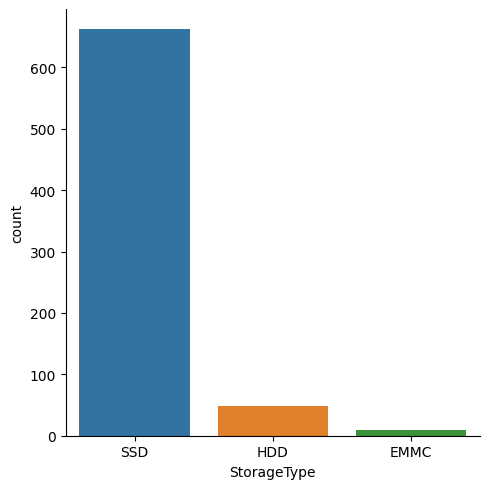

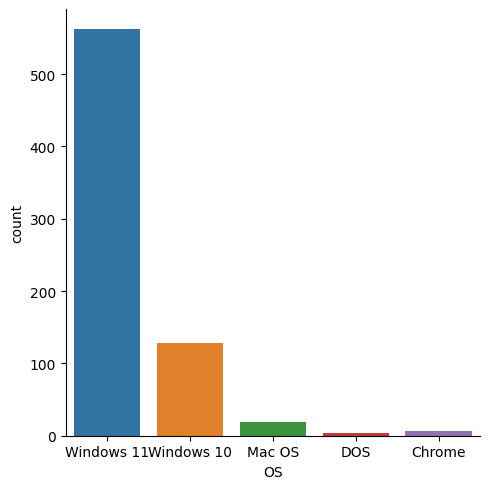

In [ ]:
# Univariate plots
sns.displot(data=data, x="MRP", kde=True)
sns.catplot(data=data, x="Ram Size", kind="count")
sns.catplot(data=data, x="Storage", kind="count")
sns.catplot(data=data, x="StorageType", kind="count")
sns.catplot(data=data, x="OS", kind="count")

plt.show()


##Visualization Reports
#### The Above plots shows univariate plots of the data sets
* The first plot shows the distribution of the price which is the target variable and shows 
the need for data transformation base on the left skewness
* The Other plots shows the count of the various columns in the data
The Ram SIze, Storage Storage Type and the type Of operating system

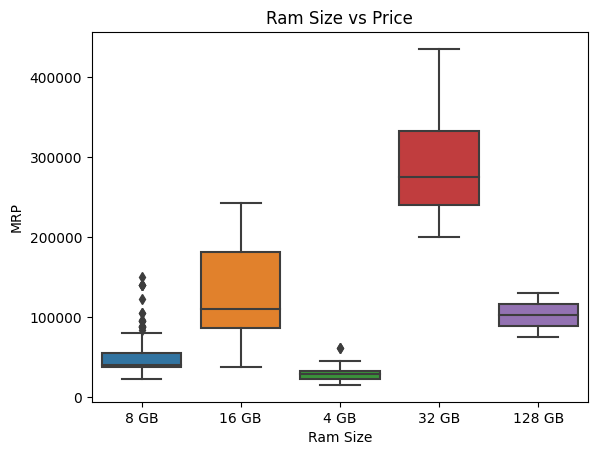

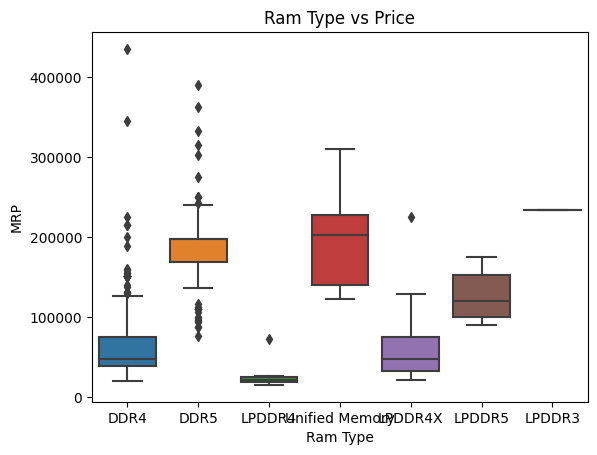

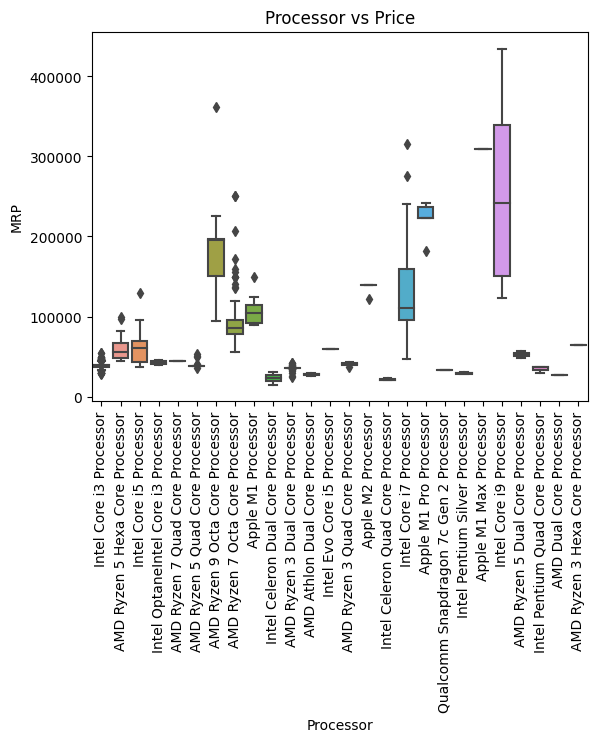

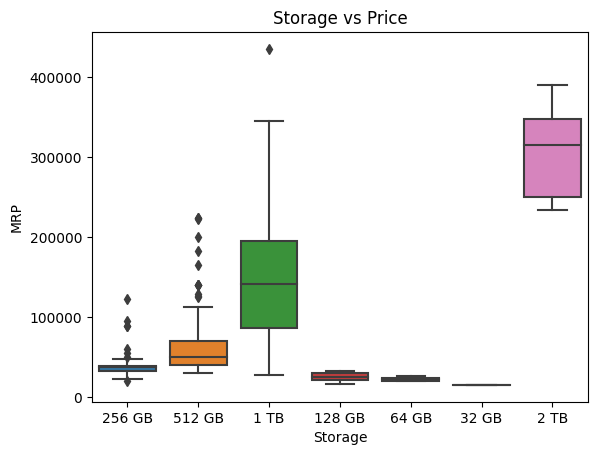

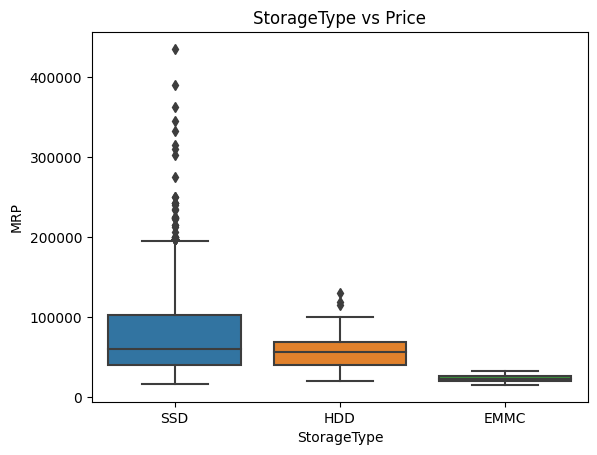

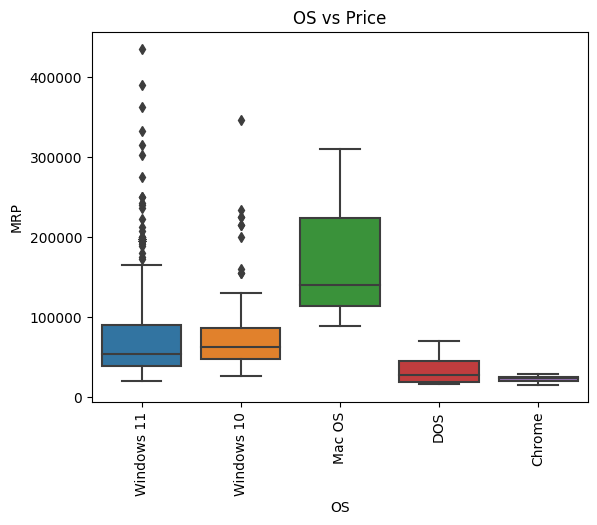

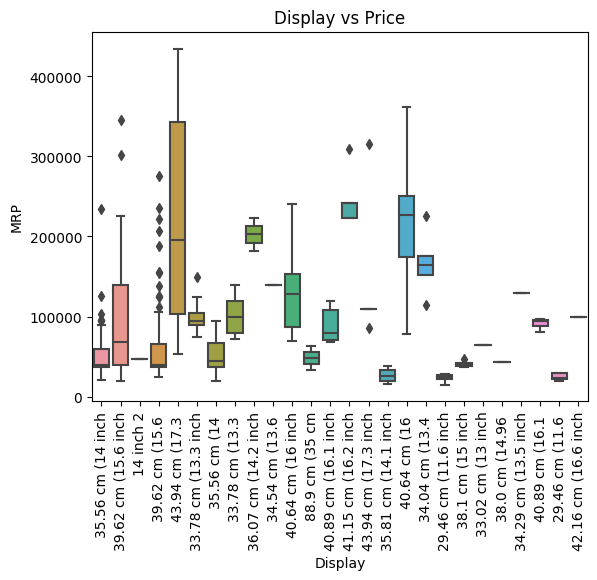

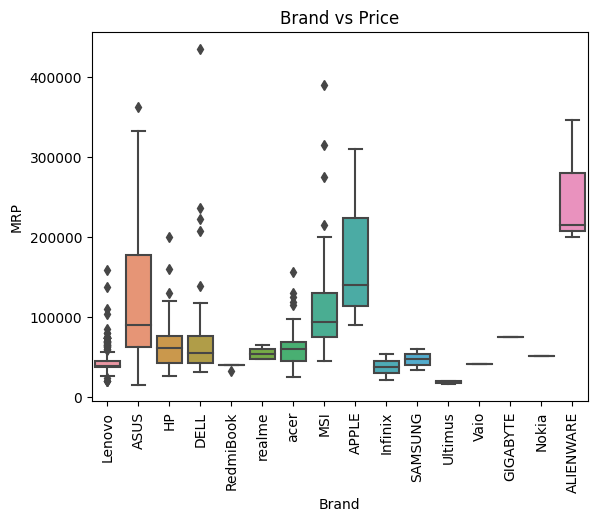

In [ ]:
sns.boxplot(x='Ram Size', y='MRP', data=df2)
plt.title('Ram Size vs Price')
plt.show()

# visualization 2: Ram Type vs Price
sns.boxplot(x='Ram Type', y='MRP', data=df2)
plt.title('Ram Type vs Price')
plt.show()

# visualization 3: Processor vs Price
sns.boxplot(x='Processor', y='MRP', data=df2)
plt.title('Processor vs Price')
plt.xticks(rotation=90)
plt.show()

# visualization 4: Storage vs Price
sns.boxplot(x='Storage', y='MRP', data=df2)
plt.title('Storage vs Price')
plt.show()

# visualization 5: StorageType vs Price
sns.boxplot(x='StorageType', y='MRP', data=df2)
plt.title('StorageType vs Price')
plt.show()

# visualization 6: OS vs Price
sns.boxplot(x='OS', y='MRP', data=df2)
plt.title('OS vs Price')
plt.xticks(rotation=90)
plt.show()

# visualization 7: Display vs Price
sns.boxplot(x='Display', y='MRP', data=df2)
plt.title('Display vs Price')
plt.xticks(rotation=90)
plt.show()

# visualization 8: Brand vs Price
sns.boxplot(x='Brand', y='MRP', data=df2)
plt.title('Brand vs Price')
plt.xticks(rotation=90)
plt.show()

## MultiVariate Visualization Reports
#### The above box plots shows the relationships between price and the various columns in the data
* The First plot show the relationship between the Ram Size and price
and shows the price seems to increase with increase in ram size
* The Second Plot shows the relationship between Storage and price
The price also seems to increase with increase in storage size
* Also the other plots shows relationship between StorageType and OS

# Encoding

In [ ]:
ram_dict = {
    '4 GB':0,
    '8 GB':1,
    '16 GB':2,
    '32 GB':3,
    '128 GB':4
    }

ram_type_dict = {
    'LPDDR3':0,
    'Unified Memory':1,
    'LPDDR4':2,'DDR4':3,
    'LPDDR4X':4,
    'LPDDR5':5,
    'DDR5':6
    }
processor_dict = {
    'AMD Athlon Dual Core Processor':0,
    'AMD Dual Core Processor':1,
    'Intel Celeron Dual Core Processor':2,
    'Intel Celeron Quad Core Processor':3,
    'Intel Pentium Quad Core Processor':4,
    'Intel Pentium Silver Processor':5,
    'AMD Ryzen 3 Dual Core Processor':6,
    'AMD Ryzen 3 Quad Core Processor':7,
    'AMD Ryzen 3 Hexa Core Processor':8,
    'AMD Ryzen 5 Dual Core Processor':9,
    'AMD Ryzen 5 Quad Core Processor':10,
    'AMD Ryzen 5 Hexa Core Processor':11,
    'AMD Ryzen 7 Quad Core Processor':12,
    'AMD Ryzen 7 Octa Core Processor':13,
    'AMD Ryzen 9 Octa Core Processor':14,
    'Apple M1 Processor':15,
    'Apple M1 Pro Processor':16,
    'Apple M1 Max Processor':17,
    'Apple M2 Processor':18,
    'Intel Core i3 Processor':19,
    'Intel OptaneIntel Core i3 Processor':20,
    'Intel Core i5 Processor':21,
    'Intel Evo Core i5 Processor':22,
    'Intel Core i7 Processor':23,
    'Intel Core i9 Processor':24,
    'Qualcomm Snapdragon 7c Gen 2 Processor':25
}


storage = [
    '32 GB',
    '64 GB',
    '128 GB',
    '256 GB',
    '512 GB',
    '1 TB',
    '2 TB'
]
storage_dict = {s: i for i, s in enumerate(storage)}

storage_type_dict = {
    'EMMC':0,
    'HDD':1,
    'SSD':2
}


column_dicts = {
    'Ram Size':ram_dict,
    'Ram Type':ram_type_dict,
    'Processor':processor_dict,
    'Storage':storage_dict,
    'StorageType':storage_type_dict
}


In [ ]:
propertydict = []
for col,col_dict in column_dicts.items():
  le = LabelEncoder().fit([*col_dict.keys()])

  #df2[col] = df2[col].map(col_dict).astype(int)
  le.classes_ = np.array([key for key in sorted(col_dict, key=col_dict.get)])
  df2[col] = le.transform(df2[col])
  df2[col] = pd.Categorical(df2[col], categories=col_dict.values(), ordered=True)
  propertydict.append(col_dict)





In [ ]:
df2.head()

,MRP,Ram Size,Ram Type,Processor,Storage,OS,Display,Brand,StorageType
0,36990.0,1,3,19,3,Windows 11,35.56 cm (14 inch,Lenovo,2
1,39990.0,1,3,19,4,Windows 11,39.62 cm (15.6 inch,Lenovo,2
2,32990.0,1,3,19,4,Windows 11,39.62 cm (15.6 inch,ASUS,2
3,49990.0,1,3,11,4,Windows 10,39.62 cm (15.6 inch,HP,2
4,49990.0,1,3,21,4,Windows 11,39.62 cm (15.6 inch,ASUS,2


In [ ]:
le2 = LabelEncoder()


label_encoding_categorical_columns = ['OS', 'Display','Brand']

for column in label_encoding_categorical_columns:
  encoded = le2.fit_transform(df2[column])
  df2.drop(column, axis=1, inplace=True)
  df2[column] = encoded
  df2[column] = df2[column].astype('category')
  feature_dict = dict(zip(range(len(le2.classes_)), le2.classes_))
  propertydict.append(feature_dict)


In [ ]:
propertydict

[{'4 GB': 0, '8 GB': 1, '16 GB': 2, '32 GB': 3, '128 GB': 4},
 {'LPDDR3': 0,
  'Unified Memory': 1,
  'LPDDR4': 2,
  'DDR4': 3,
  'LPDDR4X': 4,
  'LPDDR5': 5,
  'DDR5': 6},
 {'AMD Athlon Dual Core Processor': 0,
  'AMD Dual Core Processor': 1,
  'Intel Celeron Dual Core Processor': 2,
  'Intel Celeron Quad Core Processor': 3,
  'Intel Pentium Quad Core Processor': 4,
  'Intel Pentium Silver Processor': 5,
  'AMD Ryzen 3 Dual Core Processor': 6,
  'AMD Ryzen 3 Quad Core Processor': 7,
  'AMD Ryzen 3 Hexa Core Processor': 8,
  'AMD Ryzen 5 Dual Core Processor': 9,
  'AMD Ryzen 5 Quad Core Processor': 10,
  'AMD Ryzen 5 Hexa Core Processor': 11,
  'AMD Ryzen 7 Quad Core Processor': 12,
  'AMD Ryzen 7 Octa Core Processor': 13,
  'AMD Ryzen 9 Octa Core Processor': 14,
  'Apple M1 Processor': 15,
  'Apple M1 Pro Processor': 16,
  'Apple M1 Max Processor': 17,
  'Apple M2 Processor': 18,
  'Intel Core i3 Processor': 19,
  'Intel OptaneIntel Core i3 Processor': 20,
  'Intel Core i5 Processor':

In [ ]:
np.quantile(df2.MRP,0.80)

119990.0

### Model Building

<ipython-input-20-f9b0a7331df2>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='MRP', ylabel='Density'>

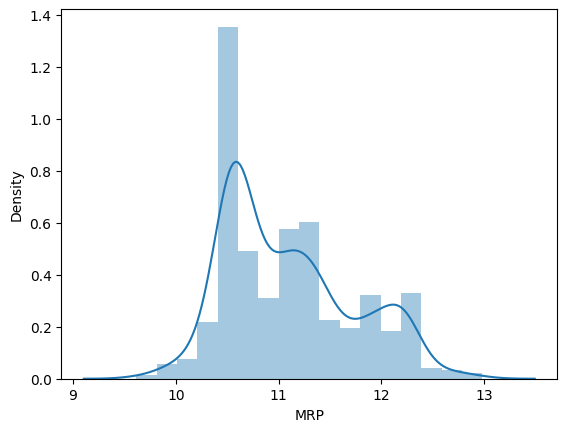

In [ ]:
# Split Data Set
from sklearn.model_selection import train_test_split 
import scipy.stats as stats


y = np.log(df2['MRP'])
x = df2.drop('MRP', axis =1)

sns.distplot(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
for item in propertydict:
  print(item[1])

DOS
29.46 cm (11.6 
APPLE
{'LPDDR3': 0, 'Unified Memory': 1, 'LPDDR4': 2, 'DDR4': 3, 'LPDDR4X': 4, 'LPDDR5': 5, 'DDR5': 6}


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


model = LinearRegression()
GBR = GradientBoostingRegressor()


In [ ]:
GBR.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
prediction = GBR.predict(X_test)

In [ ]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



# evaluate the model
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R-squared: ", r2)


MSE:  0.024185011792113294
RMSE:  0.15551531047492814
R-squared:  0.9405267555853674


In [ ]:
sns.boxplot(data=df2,y='MRP', x='OS')

## Hyper Parameter Tuning

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
               'subsample'    : [0.9, 0.5, 0.2, 0.1],
               'n_estimators' : [100,500,1000, 1500],
               'max_depth'    : [4,6,8,10]
               }

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=8, n_estimators=500,
                          subsample=0.1)

 The best score across ALL searched params:
 0.9220024850425534

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.1}


In [ ]:
mainModel = GradientBoostingRegressor(learning_rate=0.02, max_depth=8, n_estimators=500,subsample=0.1)

In [ ]:
mainModel.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=8, n_estimators=500,
                          subsample=0.1)

In [ ]:
pred =mainModel.predict(X_test)

In [ ]:
# evaluate the model
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R-squared: ", r2)

MSE:  0.024499026322880594
RMSE:  0.15652164809661503
R-squared:  0.9397545639859338


In [ ]:
X_train.head()

,Ram Size,Ram Type,Processor,Storage,StorageType,OS,Display,Brand
551,1,3,11,4,2,4,16,7
598,1,3,19,5,1,4,14,3
697,1,3,19,4,2,4,16,7
140,1,3,21,4,2,4,16,5
28,2,3,21,4,2,4,16,14


In [ ]:
import joblib

joblib.dump(mainModel,'model.pkl')

['model.pkl']

In [ ]:
import json

with open('propertydict.json', 'w') as fp:
    json.dump(propertydict, fp)

In [ ]:
X_train.head()

,Ram Size,Ram Type,Processor,Storage,StorageType,OS,Display,Brand
551,1,3,11,4,2,4,16,7
598,1,3,19,5,1,4,14,3
697,1,3,19,4,2,4,16,7
140,1,3,21,4,2,4,16,5
28,2,3,21,4,2,4,16,14


In [ ]:
propertydict[7].values()

dict_values(['ALIENWARE', 'APPLE', 'ASUS', 'DELL', 'GIGABYTE', 'HP', 'Infinix', 'Lenovo', 'MSI', 'Nokia', 'RedmiBook', 'SAMSUNG', 'Ultimus', 'Vaio', 'acer', 'realme'])

In [ ]:
X_train.columns

Index(['Ram Size', 'Ram Type', 'Processor', 'Storage', 'StorageType', 'OS',
       'Display', 'Brand'],
      dtype='object')